In [1]:
##Editor Qiuming Li
##read image
import matplotlib.pyplot as plt
img=plt.imread(r'C:\Users\49162\Desktop\python\2021_04_21_16_51_35_Depth_1.png')
print(img)

[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.4745098  0.4745098  0.4745098 ]
  [0.47058824 0.47058824 0.47058824]
  [0.47058824 0.47058824 0.47058824]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.47843137 0.47843137 0.47843137]
  [0.4745098  0.4745098  0.4745098 ]
  [0.4745098  0.4745098  0.4745098 ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.47843137 0.47843137 0.47843137]
  [0.4745098  0.4745098  0.4745098 ]
  [0.4745098  0.4745098  0.4745098 ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.46666667 0.46666667 0.46666667]
  [0.4627451  0.4627451  0.4627451 ]
  [0.4627451  0.4627451  0.4627451 ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


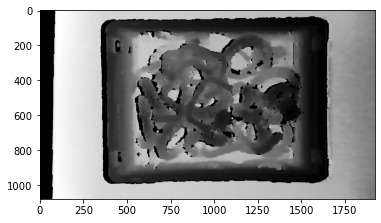

In [2]:
##show image
plt.imshow(img,cmap=plt.cm.binary)
plt.show()

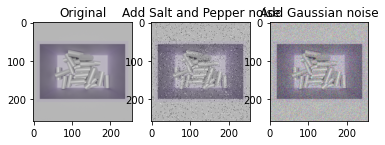

In [16]:
import numpy as np

import random

import cv2

from matplotlib import pyplot as plt

def sp_noise(image,prob):

    

    ##Add salt and pepper noise

    ##prob: noise ratio

   

    output = np.zeros(image.shape,np.uint8)

    thres = 1 - prob

    for i in range(image.shape[0]):

        for j in range(image.shape[1]):

            rdn = random.random()

            if rdn < prob:

                output[i][j] = 0

            elif rdn > thres:

                output[i][j] = 255

            else:

                output[i][j] = image[i][j]

    return output

def gasuss_noise(image, mean=0, var=0.001):

   

        ##Add Gaussian noise

        ##mean : mean value

        ##var : variance

   

    image = np.array(image/255, dtype=float)

    noise = np.random.normal(mean, var ** 0.5, image.shape)

    out = image + noise

    if out.min() < 0:

        low_clip = -1.

    else:

        low_clip = 0.

    out = np.clip(out, low_clip, 1.0)

    out = np.uint8(out*255)

    #cv.imshow("gasuss", out)

    return out

def random_noise(image,noise_num):
    
     ##Add random noise (actually randomly change the gray value of the pixel to 255 or white on the image)
     ##:param image: image to add noise
     ##:param noise_num: The number of noise points to add, usually thousands of levels
     ## :return:img_noise
    
   
    img = cv2.imread(image)
    img_noise = img
    rows, cols, chn = img_noise.shape
    # add noise
    for i in range(noise_num):
        x = np.random.randint(0, rows)#Randomly generate a specified range of integers
        y = np.random.randint(0, cols)
        img_noise[x, y, :] = 255
    return img_noise

# Read image

img = cv2.imread(r'C:\Users\49162\Desktop\python\CameraImage_0001.png')

# Add salt and pepper noise with a noise scale of 0.02

out1 = sp_noise(img, prob=0.02)

# Add Gaussian noise with mean 0 and variance 0.001

out2 = gasuss_noise(img, mean=0, var=0.009)

# show images

plt.figure(1)

plt.subplot(131)

plt.axis('on')  # Close the axes

plt.title('Original')

plt.imshow(img)

plt.subplot(132)

plt.axis('on')

plt.title('Add Salt and Pepper noise')

plt.imshow(out1)

plt.subplot(133)

plt.axis('on')

plt.title('Add Gaussian noise')

plt.imshow(out2)

plt.show()

In [1]:
## Method 2 to add noise
import numpy as np

import random

import cv2

import matplotlib.pyplot as plt

def random_noise(image,noise_num):
   
   
    img = cv2.imread(image)
    img_noise = img
    rows, cols, chn = img_noise.shape
   
    for i in range(noise_num):
        x = np.random.randint(0, rows)
        y = np.random.randint(0, cols)
        img_noise[x, y, :] = 255
    return img_noise
img_noise = random_noise(r'C:\Users\49162\Desktop\python\CameraImage_0001.png',5000)
cv2.imshow('random_noise',img_noise)
cv2.waitKey(0)

def sp_noise(image,prob):
   
    image = cv2.imread(image)
    output = np.zeros(image.shape,np.uint8)
    noise_out = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
                noise_out[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
                noise_out[i][j] = 255
            else:
                output[i][j] = image[i][j]
                noise_out[i][j] = 100
    result = [noise_out,output]
    return result
sp_noise,img_noise = sp_noise(r'C:\Users\49162\Desktop\python\CameraImage_0001.png',0.1)
cv2.imshow('sp_noise',sp_noise)
cv2.imshow('sp_noise_img',img_noise)
cv2.waitKey(0)

def gasuss_noise(image, mean=0, var=0.001):
   
    image = cv2.imread(image)
    image = np.array(image/255, dtype=float)
    noise = np.random.normal(mean, var ** 0.5, image.shape)
    out = image + noise
    if out.min() < 0:
        low_clip = -1.
    else:
        low_clip = 0.
    out = np.clip(out, low_clip, 1.0)
    out = np.uint8(out*255)
    #cv.imshow("gasuss", out)
    noise = noise*255
    return [noise,out]
noise,out = gasuss_noise(r'C:\Users\49162\Desktop\python\CameraImage_0001.png', mean=0, var=0.003)
cv2.imshow('noise',noise)
cv2.imshow('out',out)
cv2.waitKey(0)


-1